In [1]:
import numpy as np
import copy
import pickle

from scipy import ndimage
from BaselineRemoval import BaselineRemoval
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
from math import *
/
# plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['figure.dpi'] = 100
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
file_location = "../data/Raman_Mouse/corrected_4_wavenumbers/"
# file_location = "../data/Green_excitation/corrected_4_wavenumbers/"

filenames = np.load(f"{file_location}FileNames.npy")
with open(f"{'/'.join(file_location.split('/')[:-2])}/Sample_labels.pickle", 'rb') as f:
    labels = pickle.load(f)
labels = {l.split(".")[0]: val for l, val in labels.items()}

wavenumbers = np.load(f"{file_location}Wavenumbers.npy")
    
data = []
for f in filenames:
    x = np.load(f"{file_location}{f.split('.')[0]}.npy")
    data.append(((x.reshape(-1,x.shape[-1])).reshape(x.shape), labels[f.split(".")[0]]))

In [4]:
def gaussian(x, mu, sigma, scale):
    x = scale * np.exp(-0.5* ((x - mu) / sigma)**2)
    return x 

def split_signal(x):
    x = img[0].reshape(-1, img[0].shape[-1])
    n = np.random.randint(x.shape[0])
    n = 85
    
    x_ = copy.copy(x[n])
    x_ -= np.mean(x_)
    x_ = np.concatenate((x_, x_[::-1]))
    
#     green, orange, red = 4,8,12
#     x = np.arange(1024)
#     stoplicht1 = np.zeros(1024)
#     stoplicht1[:300] = np.cos(x[:300]/red)
#     stoplicht1[300:500] = np.cos(x[300:500]/orange)
#     stoplicht1[500:] = np.cos(x[500:]/green)
#     stoplicht2 = np.zeros(1024)
#     stoplicht2[:100] = np.cos(x[:100]/orange)
#     stoplicht2[100:400] = np.cos(x[100:400]/red)
#     stoplicht2[400:500] = np.cos(x[400:500]/orange)
#     stoplicht2[500:] = np.cos(x[500:]/green)
#     stoplicht3 = np.cos(x/green) + np.cos(x/orange) + np.cos(x/red)
    
#     plt.plot(stoplicht1)
#     plt.show()
#     plt.plot(stoplicht2)
#     plt.show()
#     plt.plot(stoplicht3)
#     plt.show()
        
#     widths = np.arange(1,1301)
#     widths = np.linspace(0.001, 100, 1024)
    widths = np.logspace(0, 3, 1001)
#     plt.plot(widths)
#     plt.yscale('log')
#     plt.show()
    
    func = signal.morlet2
#     for w in widths:
#         plt.plot(func(min(1000, 10*w),w))
#     plt.show()
    
#     cwtmatr = signal.cwt(stoplicht1, func, widths)
#     PSD = (cwtmatr * np.conj(cwtmatr)).real
#     plt.imshow(PSD, aspect='auto', vmax=PSD.max(), vmin=0)
#     plt.show()
    
#     cwtmatr = signal.cwt(stoplicht2, func, widths)
#     PSD = (cwtmatr * np.conj(cwtmatr)).real
#     plt.imshow(PSD, aspect='auto', vmax=PSD.max(), vmin=0)
#     plt.show()
    
#     cwtmatr = signal.cwt(stoplicht3, func, widths)
#     PSD = (cwtmatr * np.conj(cwtmatr)).real
#     plt.imshow(PSD, aspect='auto', vmax=PSD.max(), vmin=0)
#     plt.show()
    
    
    cwtmatr = signal.cwt(x_, func, widths)
    PSD = (cwtmatr * np.conj(cwtmatr)).real
    R, I = cwtmatr.real, cwtmatr.imag
    plt.imshow(np.log(PSD), aspect='auto', vmax=np.log(PSD.max()), vmin=0)
    plt.show()
    plt.imshow(PSD, aspect='auto', vmax=PSD.max(), vmin=0)
    plt.show()
    plt.imshow(np.log(np.abs(R)), aspect='auto', vmax=np.log(R.max()), vmin=0)
    plt.show()
    plt.imshow(np.log(np.abs(I)), aspect='auto', vmax=np.log(I.max()), vmin=0)
    plt.show()


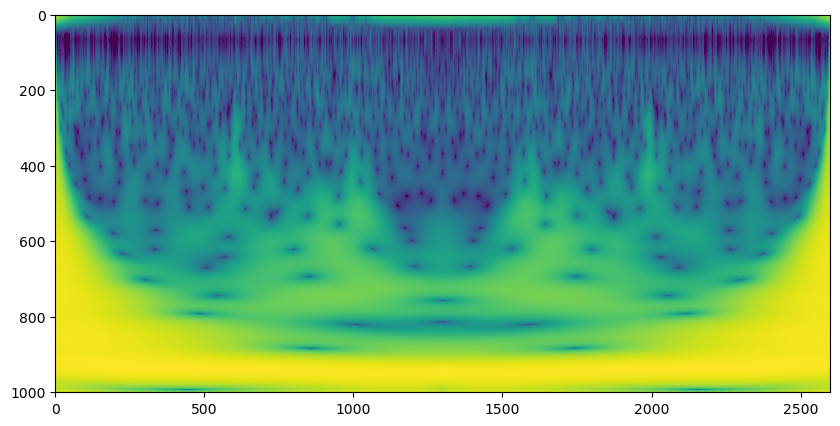

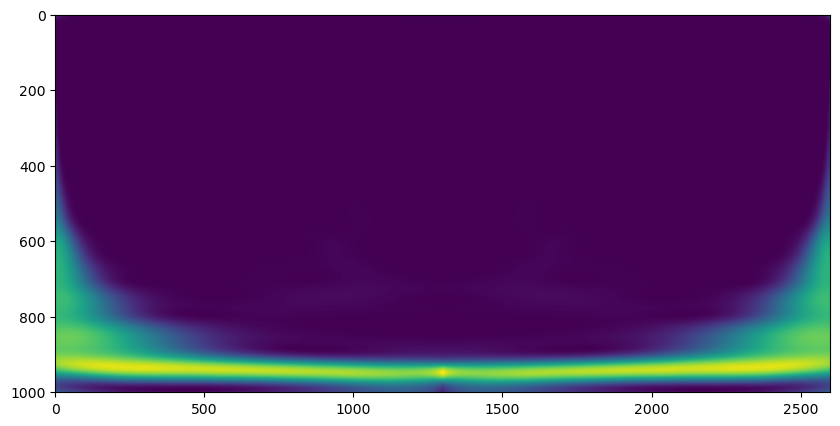

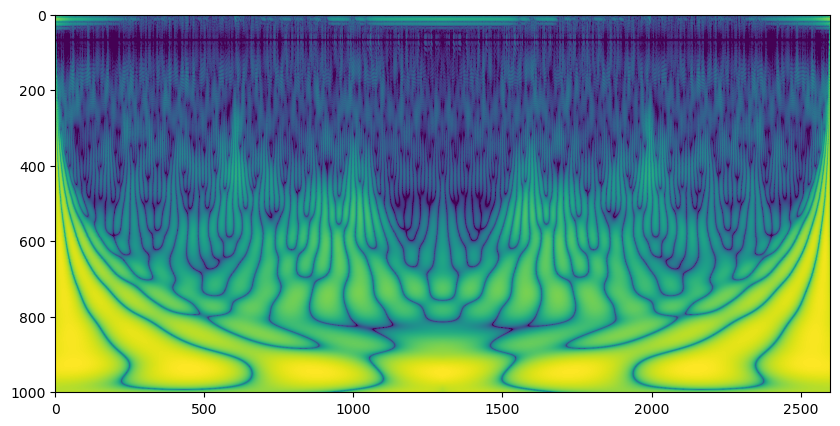

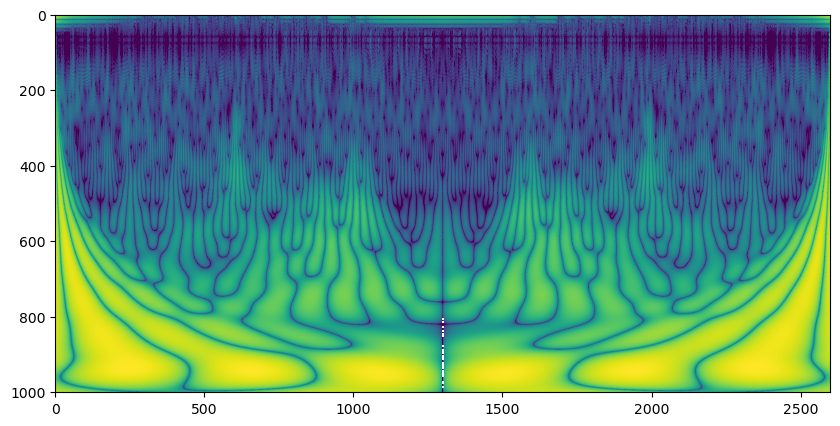

TypeError: cannot unpack non-iterable NoneType object

In [5]:
import timeit
from os import path

file_location2 = f"{'/'.join(file_location.split('/')[:-2])}/approximated/"
os.makedirs(file_location2, exist_ok=True)

shape = data[0][0].shape

for j, (f, img) in enumerate(zip(filenames, data)):   
    start = timeit.default_timer()
#     if path.exists(f'{file_location2}{f.split("/")[-1].split(".")[0]}_raman.npy'):
#         print(f'file already exist {file_location2}{f.split("/")[-1].split(".")[0]}_raman')
#         continue

#     if j < 7:
#         continue
    
    raman, photo = split_signal(img)

    stop = timeit.default_timer()
    print('Time: ', stop - start)  

    np.save(f'{file_location2}{f.split("/")[-1].split(".")[0]}_raman', raman.reshape(shape))
    np.save(f'{file_location2}{f.split("/")[-1].split(".")[0]}_photoluminescence', photo.reshape(shape))
    print(f"image: {f} is done.")